# Data Analyst Assessment
#### Submitted By Suchada Wongkot

## 1. Importing data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
excel_file = pd.ExcelFile("/Users/yourus_m/Downloads/Data_Analyst_Assessment.xlsx")
print(excel_file.sheet_names)

['Q&A', 'Data']


In [3]:
import pandas as pd
df = pd.read_excel("/Users/yourus_m/Downloads/Data_Analyst_Assessment.xlsx", sheet_name="Data")  
print(df)

               Created On Case Number Case Country Client Group Client  \
0     2024-11-18 09:40:33    CC-D5727    Country R            A  C-001   
1     2024-11-18 09:28:19    CC-D5726    Country R            B  C-002   
2     2024-11-18 09:17:38    CC-D5725    Country R            C  C-003   
3     2024-11-18 08:56:47    CC-D5724    Country M          NaN  C-004   
4     2024-11-18 08:52:23    CC-D5723    Country D            A  C-005   
...                   ...         ...          ...          ...    ...   
35719 2022-01-01 14:12:55    CC-A0005    Country R            M  C-034   
35720 2022-01-01 13:44:06    CC-A0004    Country R            M  C-034   
35721 2022-01-01 11:14:07    CC-A0003    Country R            M  C-034   
35722 2022-01-01 09:22:03    CC-A0002    Country R            P  C-046   
35723 2022-01-01 07:04:46    CC-A0001    Country F          NaN  C-004   

       Patient Date of Birth (Patient)                ICD Code Diagnosis  \
0      P-10999     1999-08-24 00:00

The dataset contains 35,724 rows and 16 columns, representing client or patient case records. Each column provides information related to medical diagnosis, treatment, demographics, and service details.

**Column Descriptions**
- Created On: The date and time when the case record was created in the system.
- Case Number: A unique identifier assigned to each case or record.
- Case Country: Indicates the country where the case was registered or reported.
- Client Group: Categorizes clients into specific groups (e.g., A, B, C, etc.)
- Client: Represents the client’s unique code or identifier.
- Patient: A unique code identifying the patient associated with the case.
- Date of Birth (Patient): The patient’s date of birth.
- ICD Code Diagnosis: The official diagnosis code following the International Classification of Diseases (ICD) system.
- ICD Diagnosis Title: The textual description corresponding to the ICD code.
- Number of Treatments: Indicates the total number of treatment sessions provided to the patient for the case.
- Number of Services: Represents the total count of services delivered under the case.
- Status: Shows the current case status (e.g., Active, Resolved).
- Age: The patient’s age (in years) calculated from their date of birth.
- Age Group: Categorizes patients into groups such as Children & Adolescent, Adult, and Elderly.
- ICD Group: A broader classification grouping related ICD codes.
- Diagnosis Group: The descriptive group name corresponding to the ICD Group (e.g., Accidents and Injuries, Infections, Cardiovascular Diseases).

Ref:
- https://www.who.int/standards/classifications/classification-of-diseases?utm_source=chatgpt.com
- https://icd.who.int/browse10/2019/en

## 2. Inspecting Data and checking missing value(s)

In [4]:
df.shape

(35724, 16)

In [5]:
df.dtypes

Created On                 datetime64[ns]
Case Number                        object
Case Country                       object
Client Group                       object
Client                             object
Patient                            object
Date of Birth (Patient)            object
ICD Code Diagnosis                 object
ICD Diganosis Title                object
Number of Treatments              float64
Number of Services                float64
Status                             object
Age                                 int64
Age Group                          object
ICD Group                          object
Diagnosis Group                    object
dtype: object

In [6]:
df.columns.values

array(['Created On', 'Case Number', 'Case Country', 'Client Group',
       'Client', 'Patient', 'Date of Birth (Patient)',
       'ICD Code Diagnosis', 'ICD Diganosis Title',
       'Number of Treatments', 'Number of Services', 'Status', 'Age',
       'Age Group', 'ICD Group', 'Diagnosis Group'], dtype=object)

checking missing value

In [7]:
df.isnull()

,Created On,Case Number,Case Country,Client Group,Client,Patient,Date of Birth (Patient),ICD Code Diagnosis,ICD Diganosis Title,Number of Treatments,Number of Services,Status,Age,Age Group,ICD Group,Diagnosis Group
0,False,False,False,False,False,False,False,True,True,False,True,False,False,False,True,False
1,False,False,False,False,False,False,False,True,True,False,True,False,False,False,True,False
2,False,False,False,False,False,False,False,True,True,False,True,False,False,False,True,False
3,False,False,False,True,False,False,False,True,True,False,True,False,False,False,True,False
4,False,False,False,False,False,False,False,True,True,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35719,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
35720,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
35721,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
35722,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False


In [8]:
df.isnull().values.any()

True

In [9]:
df.isnull ().sum().sum()

47229

In [10]:
df.isnull ().sum()

Created On                     0
Case Number                    0
Case Country                   0
Client Group                3056
Client                         0
Patient                        0
Date of Birth (Patient)      344
ICD Code Diagnosis          4485
ICD Diganosis Title         4592
Number of Treatments        1312
Number of Services         28955
Status                         0
Age                            0
Age Group                      0
ICD Group                   4485
Diagnosis Group                0
dtype: int64

The dataset shows varying levels of missing values across its columns, which could significantly affect data quality and analysis. Notably, the **“Number of Services”** column has the highest number of missing values (28,955), suggesting a major gap in service-related information that may limit any service-level analysis or modeling. Similarly, **“ICD Code Diagnosis”**, **“ICD Diagnosis Title”**, and **“ICD Group”** each have over 4,000 missing entries, indicating substantial incompleteness in diagnostic data—potentially due to inconsistent recording or missing patient records. **“Number of Treatments”** also has over 1,300 missing values, which may affect analyses involving treatment frequency or outcomes. In contrast, variables like **“Case Number”**, **“Case Country”**, **“Client”**, **“Patient”**, **“Status”**, **“Age”**, and **“Diagnosis Group”** have no missing values, making them reliable for further exploration. 


## 3. Data Cleaning

In [11]:
# Convert date columns to datetime
df["Created On"] = pd.to_datetime(df["Created On"], errors="coerce")

# Fill missing text values
dfnew = df.fillna({"ICD Group": "Unknown", "Client Group": "Unknown", "Date of Birth (Patient)": "Unknown", "ICD Code Diagnosis": "Unknown", "ICD Diganosis Title": "Unknown", "Number of Treatments": "Unknown", "Number of Services": "Unknown"})

# Drop duplicates if any
df = df.drop_duplicates()


In [12]:
dfnew.isnull().values.any()

False

In [13]:
dfnew.isnull ().sum().sum()

0

In [14]:
dfnew.isnull ().sum()

Created On                 0
Case Number                0
Case Country               0
Client Group               0
Client                     0
Patient                    0
Date of Birth (Patient)    0
ICD Code Diagnosis         0
ICD Diganosis Title        0
Number of Treatments       0
Number of Services         0
Status                     0
Age                        0
Age Group                  0
ICD Group                  0
Diagnosis Group            0
dtype: int64

## 4. Data Visualization 

### 4.1 Demographic Analysis

#### 4.1.1 Age group

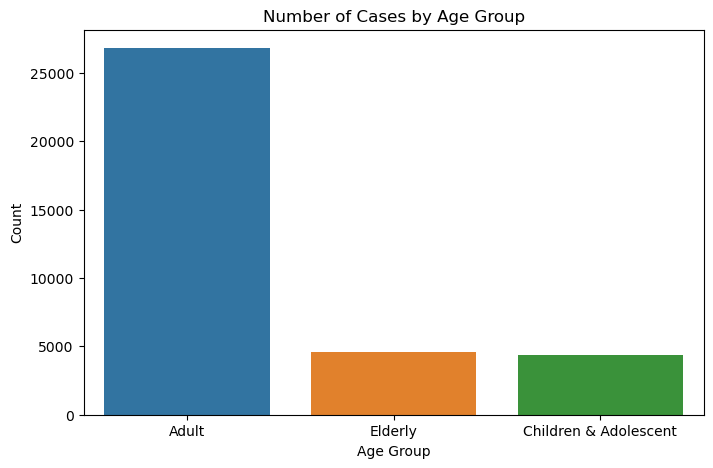

In [15]:
plt.figure(figsize=(8,5))
sns.countplot(x="Age Group", data=dfnew, order=dfnew["Age Group"].value_counts().index)
plt.title("Number of Cases by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.show()

The chart illustrating the number of cases by Age Group reveals that the **“Adult”** category has the highest count, exceeding **25,000 cases**. In contrast, the **“Elderly”**, **“Children”**, and **“Adolescent”** groups each show a relatively similar number of cases, averaging around **5,000 cases** each.

#### 4.1.2 Diagnosis Group

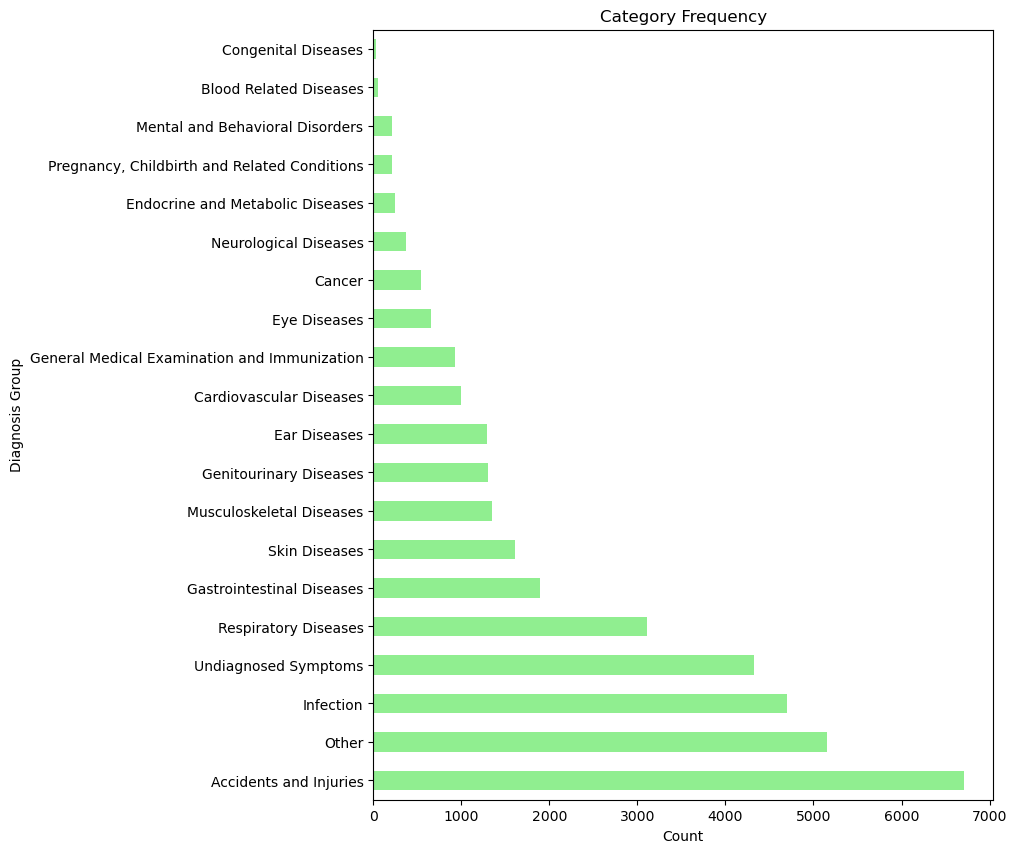

In [16]:
dfnew['Diagnosis Group'].value_counts().plot(
    kind='barh',
    figsize=(8,10),
    color='lightgreen'
)
plt.title('Category Frequency')
plt.xlabel('Count')
plt.ylabel('Diagnosis Group')
plt.show()



The chart above displays the number of cases across 20 different Diagnosis Groups. It shows that the majority of clients were diagnosed with **accidents and injuries**, making it the most common category. The **“Others”** group, which includes unidentified or uncategorized cases, ranks second, followed by **infections**, with nearly **5000 clients** diagnosed under this category. 

Conversely, the least common diagnosis is **Congenital disease**, which, according to the **World Health Organization (WHO)**, refers to structural or functional abnormalities—such as metabolic disorders—that develop during intrauterine life. These conditions can be detected prenatally, at birth, or sometimes later in infancy, for example through signs like hearing defects. In general, the term *congenital* denotes conditions that exist at or before birth.


#### 4.1.3 Top 10 Countries by Case Count

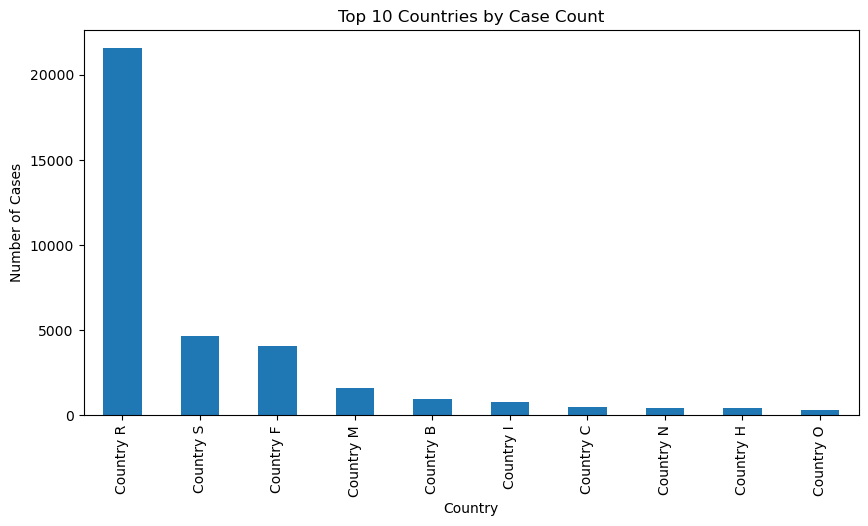

In [17]:
plt.figure(figsize=(10,5))
dfnew["Case Country"].value_counts().head(10).plot(kind="bar")
plt.title("Top 10 Countries by Case Count")
plt.xlabel("Country")
plt.ylabel("Number of Cases")
plt.show()

The chart illustrates the distribution of cases by Country. It reveals that the majority of clients are from **Country R**, with over **20,000 cases** recorded. **Country S** follows in second place with approximately **5,000 clients**, while **Country F** ranks third, also showing close to **5,000 clients or patients** overall.

### 4.2 Disease & Diagnosis Analysis

#### 4.2.1 Disease by age group

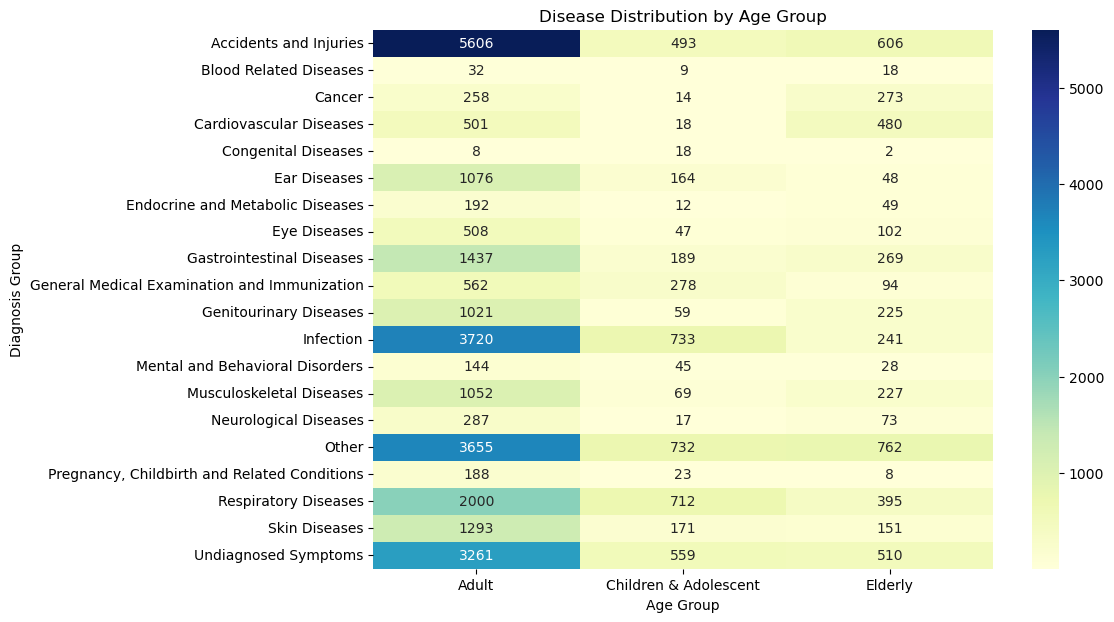

In [18]:
pivot = dfnew.pivot_table(index="Diagnosis Group", columns="Age Group", values="Case Number", aggfunc="count")
plt.figure(figsize=(10,7))
sns.heatmap(pivot, cmap="YlGnBu", annot=True, fmt=".0f")
plt.title("Disease Distribution by Age Group")
plt.show()

This visualization represents the **distribution of various disease groups across three age group categories**; *Adult*, *Children & Adolescent*, and *Elderly*. The chart helps identify **which diseases are most prevalent in each age group**.

---

### Chart Description
- **Chart Type:** Heatmap  
- **Title:** *Disease Distribution by Age Group*  
- **Axes:**
  - **X-axis (Columns):** Age Groups; *Adult*, *Children & Adolescent*, *Elderly*  
  - **Y-axis (Rows):** Diagnosis Groups (e.g., *Infection*, *Cancer*, *Accidents and Injuries*)  
- **Color Scale:**  
  - Light colors = lower number of cases  
  - Darker colors = higher number of cases  
- **Values in Cells:** Frequency or number of diagnosed cases per disease group and age group.

---

### Key Findings

#### **1. Adult Group**
- Adults show the **highest overall disease counts** across most categories.  
- Major contributors:
  - **Accidents and Injuries**: 5606 cases (highest in dataset)
  - **Infection**: 3720 cases  
  - **Respiratory Diseases**: 2000 cases  
  - **Undiagnosed Symptoms**: 3261 cases  

---

#### **2. Children & Adolescent Group**
- Lower overall frequency across categories.  
- Major contributors:
  - **Infection**: 733 cases  
  - **Respiratory Diseases**: 712 cases  
  - **Other**: 732 cases  
  - **Undiagnosed Symptoms**: 559 cases  

---

#### **3. Elderly Group**
- Fewer total cases than adults but higher in **chronic conditions**:
  - **Cancer**: 273 cases  
  - **Cardiovascular Diseases**: 480 cases  
  - **Respiratory Diseases**: 395 cases  

---

### Summary
| Age Group | Disease |
|------------|----------------|
| **Adults** | High in accidents, infections, and respiratory issues |
| **Children & Adolescent** | Moderate infection and respiratory illness rates |
| **Elderly** | Increased cancer and cardiovascular disease prevalence |

---

The heatmap clearly shows that **disease distribution varies significantly by age**.  
- Adults face the greatest health burden overall.  
- Children & adolescents show vulnerability to infections.  
- Elderly populations are more affected by chronic, degenerative diseases.  


#### 4.2.2 Disease by country

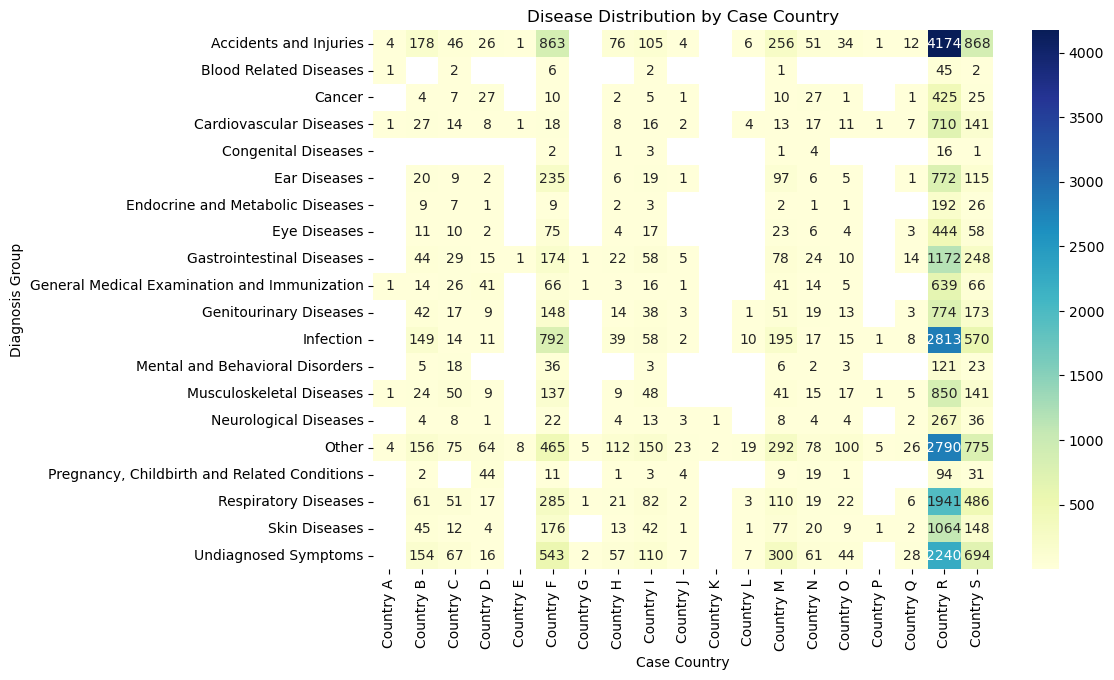

In [19]:
pivot = dfnew.pivot_table(index="Diagnosis Group", columns="Case Country", values="Case Number", aggfunc="count")
plt.figure(figsize=(10,7))
sns.heatmap(pivot, cmap="YlGnBu", annot=True, fmt=".0f")
plt.title("Disease Distribution by Case Country")
plt.show()

This heatmap illustrates the **distribution of disease groups across different countries**.  
It provides an overview of how various diagnoses are spread geographically, helping identify **countries with high or low disease burdens** in specific medical categories.

---

### Chart Description
- **Chart Type:** Heatmap  
- **Title:** *Disease Distribution by Case Country*  
- **Axes:**
  - **X-axis (Columns):** Case Countries (Country A, Country B, Country C, etc.)  
  - **Y-axis (Rows):** Diagnosis Groups (e.g., *Infection*, *Cancer*, *Accidents and Injuries*)  
- **Color Scale:**  
  - Light yellow = lower number of cases  
  - Darker blue = higher number of cases  
- **Values in Cells:** Represent the **number of diagnosed cases** for each disease type in each country.

---

### Key Findings

#### **1. High-Burden Countries**
- **Country R** shows the **highest number of cases overall**, especially for:
  - **Accidents and Injuries**: 4174 cases  
  - **Infection**: 2813 cases  
  - **Respiratory Diseases**: 1941 cases  
  - **Other**: 2790 cases  
---

#### **2. Countries with Moderate Disease Burdens**
- **Country F** and **Country Q** display **moderate counts** across multiple disease groups such as *Infection*, *Respiratory Diseases*, and *Undiagnosed Symptoms*.  

---

#### **3. Low-Burden Countries**
- **Countries A, B, and C** report relatively **low disease frequencies**, with most categories below 200 cases.  

---

### Summary
| Category | Observations | 
|-----------|---------------|
| **Infections & Injuries** | Highest in Countries R and F | 
| **Chronic Diseases (Cancer, Cardiovascular)** | Concentrated in Countries R and Q |
| **Respiratory & Undiagnosed Symptoms** | Notably high in Country R | 
| **Low Incidence Regions** | Countries A, B, and C | 

---

### Conclusion
The heatmap reveals significant **geographic variation in disease distribution**.  
- **Country R** stands out as a high-burden region for most major disease categories.  
- **Countries A–C** show minimal health burdens, suggesting effective management or smaller populations.  

### 4.3 Client insight

#### 4.3.1 Top 10 Clients by Case Count

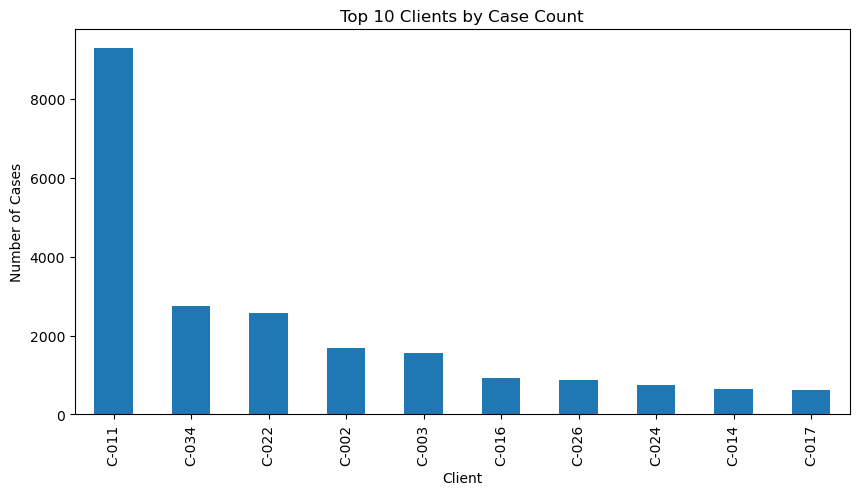

In [20]:
top_clients = dfnew["Client"].value_counts().head(10)
plt.figure(figsize=(10,5))
top_clients.plot(kind="bar")
plt.title("Top 10 Clients by Case Count")
plt.xlabel("Client")
plt.ylabel("Number of Cases")
plt.show()

**Observations**

1. Client C-011: Dominates the dataset with over 9,000 recorded cases — significantly higher than any other client.
2. Clients C-034 and C-022: Second and third positions, contributing around 2,500–2,800 cases each.
3. Clients C-002, C-003, and C-016: Mid-tier contributors with 1,000–2,000 cases each.
4. Remaining Clients (C-026, C-024, C-014, C-017): Contribute below 1,000 cases.



#### 4.3.2 Client Group vs Case Status

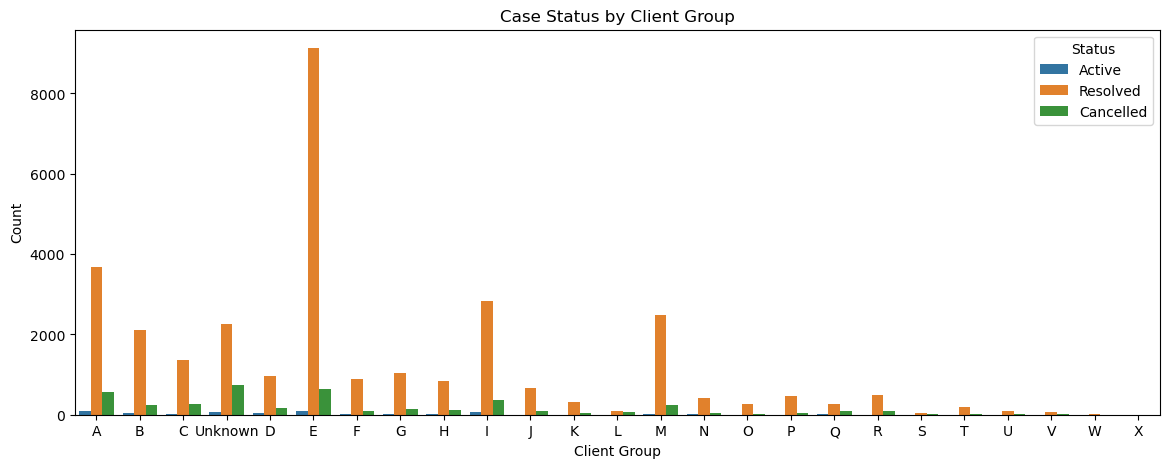

In [21]:
plt.figure(figsize=(14,5))
sns.countplot(data=dfnew, x="Client Group", hue="Status")
plt.title("Case Status by Client Group")
plt.xlabel("Client Group")
plt.ylabel("Count")
plt.legend(title="Status")
plt.show()

**Observations**

Dominant Status: Resolved cases (orange) overwhelmingly outnumber Active (blue) and Cancelled (green) across nearly all groups. Active cases are present but minimal, rarely exceeding a few hundred. Cancelled cases (green) are consistently low, typically under 500 and often near zero.

Highest Volume Groups:
- Group E: The tallest bar by far, with ~9,000 Resolved cases. 
- Group A: ~4,000 Resolved, plus small Active and Cancelled status.
- Group K: ~3,000 Resolved.
- Group D: ~2,500 Resolved, with minor Cancelled.
- Groups B, C, and M: Each ~2,000–2,500 Resolved.


Lowest Volume Groups: Many later groups (e.g., P through X) have fewer than 500 total cases, often just a handful of Resolved or Cancelled, with less visible Active cases.


### 4.4 Time series analysis

#### 4.4.1 Number of Cases Over Time

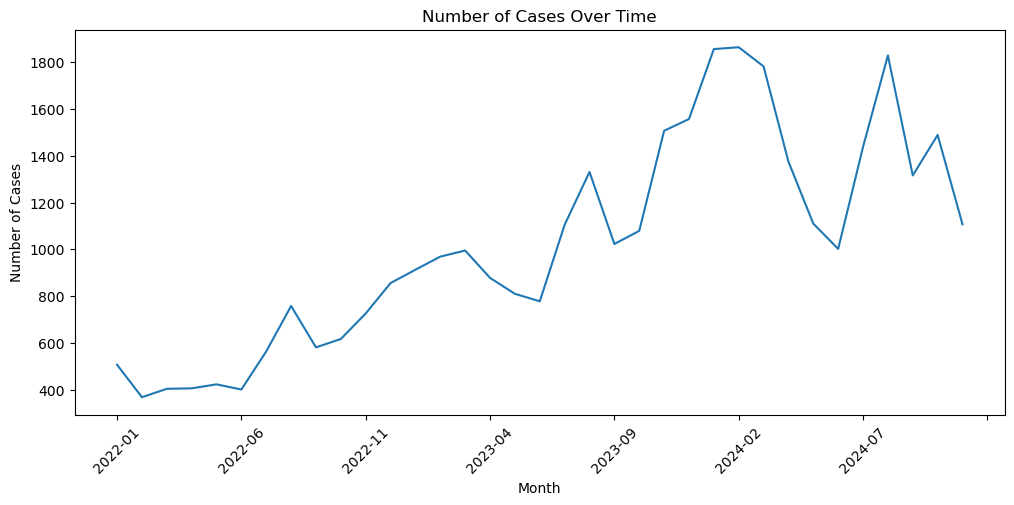

In [22]:
dfnew["Month"] = dfnew["Created On"].dt.to_period("M").astype(str)

monthly_cases = dfnew.groupby("Month")["Case Number"].count()
plt.figure(figsize=(12,5))
monthly_cases.plot()
plt.title("Number of Cases Over Time")
plt.xlabel("Month")
plt.ylabel("Number of Cases")
plt.xticks(rotation=45)
plt.show()

The chart titled **"Number of Cases Over Time"** tracks the monthly volume of cases from January 2022 through 2024. Starting at a modest low of around 500 cases in mid-2022, the count dips slightly before beginning a steady upward climb, reaching about 800 by late 2022 and crossing the 1,000 mark in early 2023. The trend accelerates into mid-2023 with a notable surge to roughly 1,300 cases around April to approximately August, followed by a brief dip and a stronger rally peaking near 1,800 in September 2023. 

Overall, the data illustrates an expanding caseload with an average monthly increase, yet marked by seasonal or event-driven.

#### 4.4.2 Average Number of Treatments Over Time

In [23]:
# Ensure 'Number of Treatments' is numeric
dfnew['Number of Treatments'] = pd.to_numeric(dfnew['Number of Treatments'], errors='coerce')

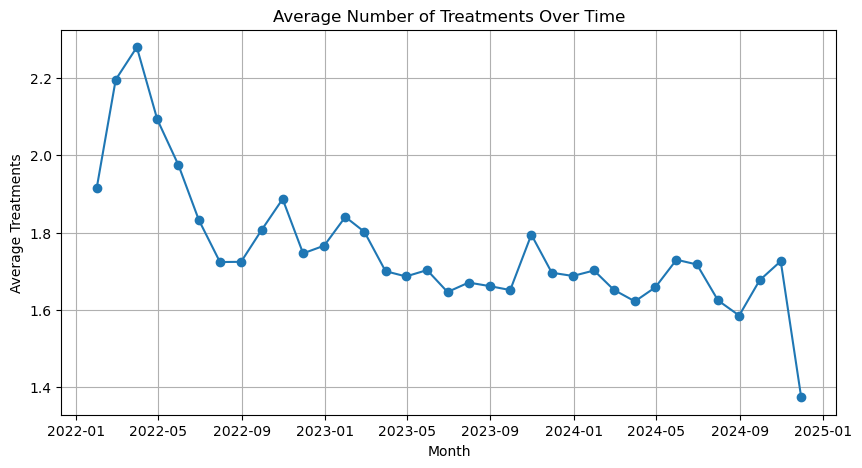

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Example: assume your dataframe is 'dfnew'
# and you have columns 'Date' and 'Number of Treatments'
# Convert Date to datetime
dfnew['Month'] = pd.to_datetime(dfnew['Created On'], errors='coerce')

# Sort by Date
dfnew = dfnew.sort_values('Month')

# Group by month (or week/day depending on your data)
monthly = dfnew.groupby(pd.Grouper(key='Month', freq='M'))['Number of Treatments'].mean()

# Plot time series
plt.figure(figsize=(10,5))
plt.plot(monthly.index, monthly.values, marker='o')
plt.title("Average Number of Treatments Over Time")
plt.xlabel("Month")
plt.ylabel("Average Treatments")
plt.grid(True)
plt.show()

#### 4.4.3 Number of Cases per Diagnosis Group Over Time

In [25]:
# Group by month ('M' for monthly, 'W' for weekly, 'D' for daily)
grouped = dfnew.groupby([pd.Grouper(key='Month', freq='M'), 'Diagnosis Group']).size().reset_index(name='Count')

pivoted = grouped.pivot(index='Month', columns='Diagnosis Group', values='Count').fillna(0)

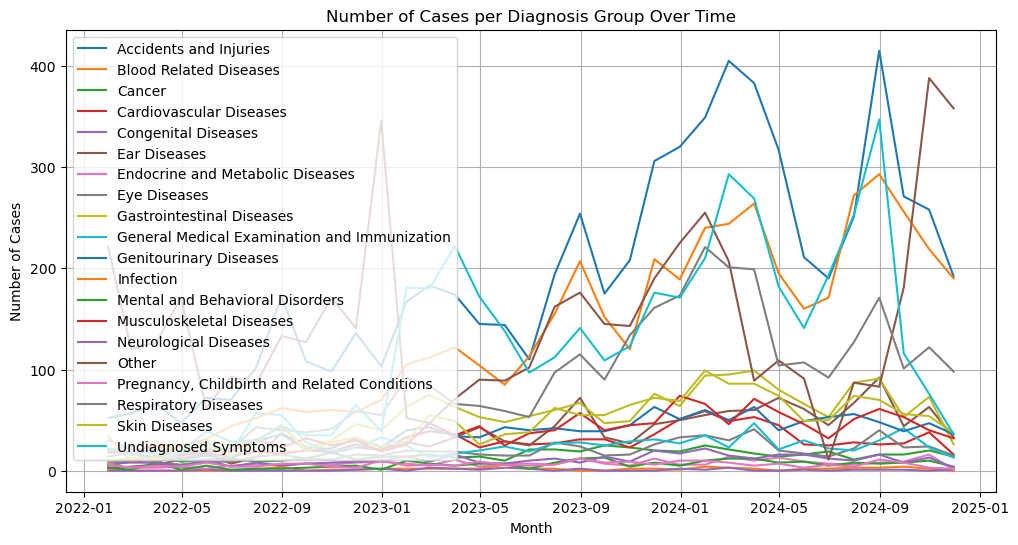

In [26]:
plt.figure(figsize=(12,6))
for col in pivoted.columns:
    plt.plot(pivoted.index, pivoted[col], label=col)

plt.title("Number of Cases per Diagnosis Group Over Time")
plt.xlabel("Month")
plt.ylabel("Number of Cases")
plt.legend()
plt.grid(True)
plt.show()


**Observations**

1. Accidents and Injuries
- Consistently the most frequent diagnosis group across the entire timeline.
- Sharp spikes observed around mid-2023 and late-2024, peaking above 400 cases.

2. Blood Related Diseases
- Remained among the top three most reported diagnosis groups.
- Notable rise in 2024.

3. General Medical Examination and Immunization
- High activity throughout 2022–2024, with multiple periodic surges around 200–300 cases.

4. Infection and Cardiovascular Diseases
- Infection cases display significant volatility, especially around early 2023 and mid-2024
- Cardiovascular diseases maintain steady numbers but with small upward trends in late 2023

5. Ear, Eye, and Gastrointestinal Diseases
- These groups show moderate but steady levels between 100–200 cases, indicating common but manageable conditions.

6. Mental and Behavioral Disorders
- Low to moderate but gradually increasing trend from 2022 to 2024.

7. Pregnancy, Childbirth, and Related Conditions
- Periodic and predictable fluctuations — no extreme spikes.

8. Musculoskeletal, Neurological, and Skin Diseases
- Remain consistently low, showing little fluctuation.

### 4.5 Treatment & Services Analysis

#### 4.5.1 Average Treatments by Diagnosis Group

In [27]:
# See unique non-numeric values
print(dfnew["Number of Treatments"].unique()[:20])

[ 1.  2. 12.  4. nan  7.  3. 16.  5. 15.  8. 22. 14.  9.  6. 10. 28. 19.
 11. 27.]


In [28]:
dfnew["Number of Treatments"] = pd.to_numeric(dfnew["Number of Treatments"], errors="coerce")

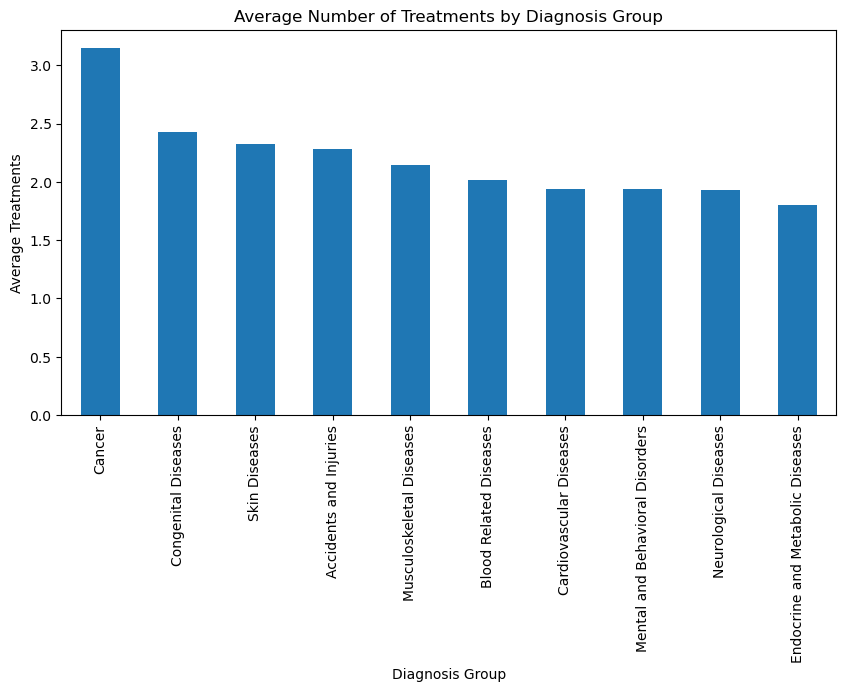

In [29]:
treatments = (
    dfnew.groupby("Diagnosis Group")["Number of Treatments"]
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(10,5))
treatments.plot(kind="bar")
plt.title("Average Number of Treatments by Diagnosis Group")
plt.xlabel("Diagnosis Group")
plt.ylabel("Average Treatments")
plt.show()


#### 4.5.2 Treatments by Case Status

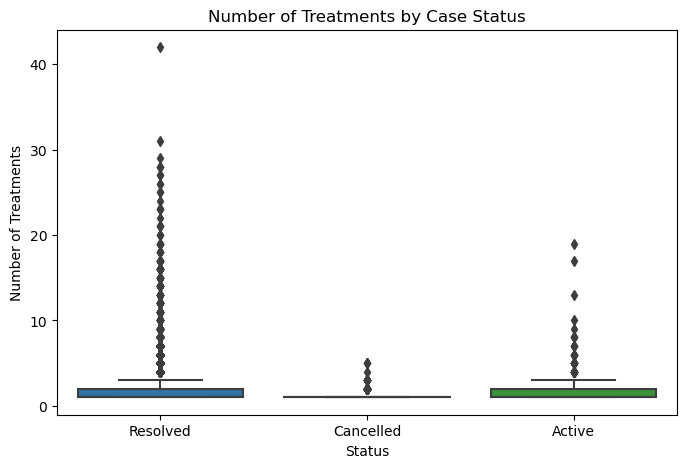

In [30]:
plt.figure(figsize=(8,5))
sns.boxplot(x="Status", y="Number of Treatments", data=dfnew)
plt.title("Number of Treatments by Case Status")
plt.show()

**Observations**

1. Resolved Cases
- Most resolved cases receive between 1 and 3 treatments, but several outliers extend beyond 30 and even above 40 treatments.

2. Active Cases
- Typically have 1 to 3 treatments, similar to resolved ones but with fewer extreme outliers.
- Some cases go beyond 10 treatments, implying that ongoing cases may still be under long-term care.

3. Cancelled Cases
- Exhibit very few treatments — generally 0 to 2.
- Outliers are minimal and range within less than 5 treatments.


### 4.6 Distribution Analysis - Distribution of Number of Treatments

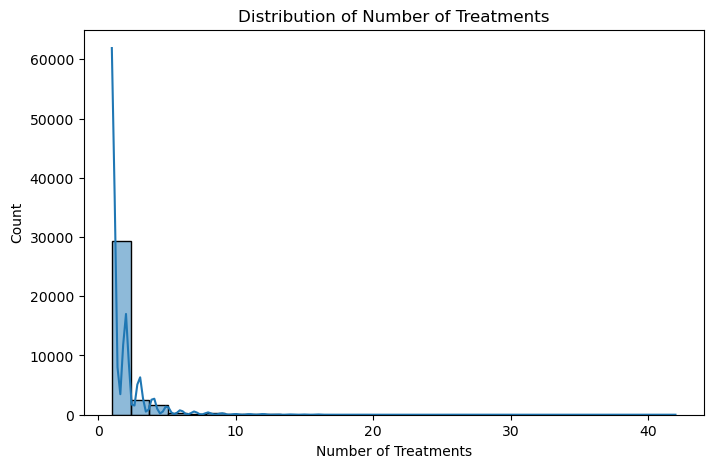

In [31]:
plt.figure(figsize=(8,5))
sns.histplot(dfnew["Number of Treatments"], kde=True, bins=30)
plt.title("Distribution of Number of Treatments")
plt.show()

## 5. Statistical Analysis


### 5.1 Basic Descriptive Statistics

In [32]:
# Summary statistics for all numeric columns
print(dfnew.describe())

print(dfnew["Number of Treatments"].describe())


                          Created On  Number of Treatments           Age  \
count                          35724          34412.000000  35724.000000   
mean   2023-10-07 04:32:11.158912768              1.708416     37.776733   
min              2022-01-01 07:04:46              1.000000      0.000000   
25%              2023-03-14 18:58:12              1.000000     25.000000   
50%       2023-11-28 14:19:15.500000              1.000000     33.000000   
75%    2024-05-09 15:39:58.750000128              2.000000     51.000000   
max              2024-11-18 09:40:33             42.000000    124.000000   
std                              NaN              1.633096     21.252637   

                               Month  
count                          35724  
mean   2023-10-07 04:32:11.158912768  
min              2022-01-01 07:04:46  
25%              2023-03-14 18:58:12  
50%       2023-11-28 14:19:15.500000  
75%    2024-05-09 15:39:58.750000128  
max              2024-11-18 09:40:33  
std

The dataset contains 35,724 records collected between January 2022 and November 2024, with most entries concentrated from early 2023 to mid-2024. On average, each individual received about 1.7 treatments, though half of them only underwent one, indicating that most clients visited once while a smaller group returned multiple times—up to a maximum of 42 treatments. The average age of individuals is around 38 years old, with the majority falling between 25 and 50 years old. However, there are some outliers and data quality issues, such as ages recorded as 0 or 124, which are likely errors. 

### 5.2 Group-based Statistics

In [33]:
stats_by_group = dfnew.groupby("Diagnosis Group")["Number of Treatments"].agg(["count", "mean", "std", "min", "max"])
print(stats_by_group)

                                              count      mean       std  min  \
Diagnosis Group                                                                
Accidents and Injuries                         6599  2.283225  2.198599  1.0   
Blood Related Diseases                           58  2.017241  1.504279  1.0   
Cancer                                          541  3.146026  3.335961  1.0   
Cardiovascular Diseases                         974  1.940452  1.511364  1.0   
Congenital Diseases                              28  2.428571  2.184602  1.0   
Ear Diseases                                   1285  1.533852  0.993663  1.0   
Endocrine and Metabolic Diseases                252  1.805556  1.149176  1.0   
Eye Diseases                                    651  1.701997  1.150376  1.0   
Gastrointestinal Diseases                      1874  1.729989  1.581624  1.0   
General Medical Examination and Immunization    920  1.581522  1.226248  1.0   
Genitourinary Diseases                  

The data shows the **average number of treatments** received by patients across different diagnosis groups. Overall, the number of treatments varies widely depending on the condition. Patients with **Cancer** and **Skin Diseases** tend to receive the most treatments on average (around 3.1 and 2.3 respectively), with some cases reaching up to 42 sessions. **Accidents and Injuries** and **Musculoskeletal Diseases** also show relatively high averages (around 2.1–2.3 treatments).

In contrast, conditions such as **Infections**, **Respiratory Diseases**, and **General Medical Examinations** typically require fewer treatments (averages between 1.3 and 1.6), reflecting shorter or one-time interventions. The **“Other”** and **“Undiagnosed Symptoms”** categories have the lowest averages (1.1–1.3).

Overall, the data suggests that **chronic or severe conditions** (like cancer, skin, or injury-related diseases) involve **more frequent or prolonged treatment**, whereas **acute or mild illnesses** usually require **only one or two visits**.


### 5.3 Correlation Analysis

                      Number of Treatments      Age
Number of Treatments               1.00000  0.07066
Age                                0.07066  1.00000


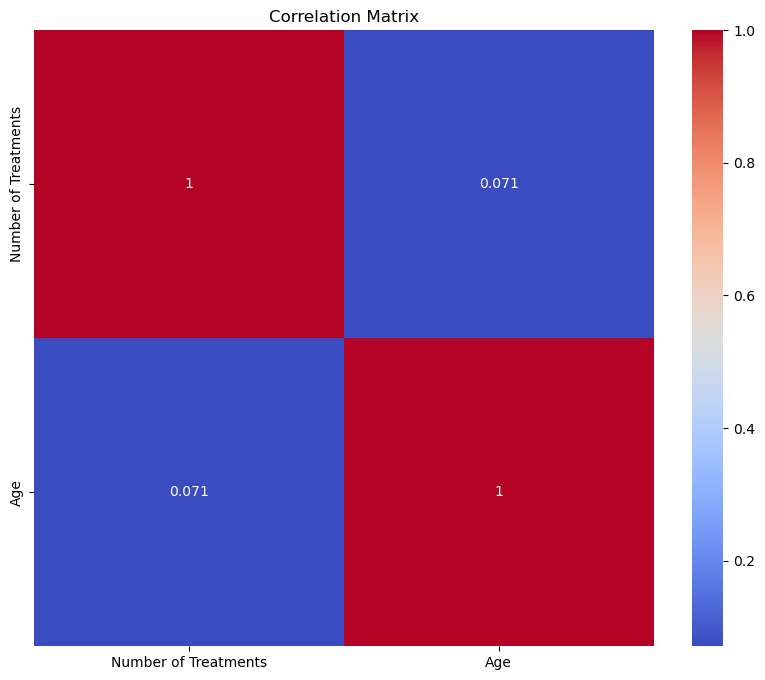

In [34]:
correlation = dfnew.corr(numeric_only=True)
print(correlation)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
sns.heatmap(correlation, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

### 5.4 Statistical Tests

In [35]:
print(dfnew["Diagnosis Group"].unique())

['Accidents and Injuries' 'Cardiovascular Diseases' 'Ear Diseases' 'Other'
 'Infection' 'General Medical Examination and Immunization'
 'Gastrointestinal Diseases' 'Genitourinary Diseases'
 'Neurological Diseases' 'Undiagnosed Symptoms' 'Musculoskeletal Diseases'
 'Skin Diseases' 'Endocrine and Metabolic Diseases' 'Cancer'
 'Pregnancy, Childbirth and Related Conditions' 'Respiratory Diseases'
 'Blood Related Diseases' 'Mental and Behavioral Disorders' 'Eye Diseases'
 'Congenital Diseases']


#### 5.4.1 t-test (compare 2 groups; Cardiovascular Diseases and Ear Diseases)

In [37]:
from scipy import stats

group1 = dfnew[dfnew["Diagnosis Group"] == "Cardiovascular Diseases"]["Number of Treatments"].dropna()
group2 = dfnew[dfnew["Diagnosis Group"] == "Ear Diseases"]["Number of Treatments"].dropna()

t_stat, p_val = stats.ttest_ind(group1, group2, equal_var=False)
print("T-statistic:", t_stat)
print("P-value:", p_val)


T-statistic: 7.286809536665012
P-value: 4.982804321069375e-13


**1. Hypotheses**
- Null hypothesis (H₀): There is no difference in the mean number of treatments between the two diagnosis groups.
- Alternative hypothesis (H₁): There is a difference in the mean number of treatments between the two groups.

**2. Results:** 

T-statistic: 7.29
- This is a large positive value, meaning the average number of treatments for one group (likely Cardiovascular Diseases, since it has a higher mean) is significantly higher than that for Ear Diseases.

P-value: 4.98 × 10⁻¹³ (essentially 0.000000000000498)
- This is much smaller than 0.05, the usual threshold for significance.

Because the p-value is extremely low, we reject the null hypothesis.
This means there is a statistically significant difference in the average number of treatments between patients with Cardiovascular Diseases and those with Ear Diseases.

#### 5.4.2 pairwise t test

In [38]:
import pandas as pd
from scipy import stats
from itertools import combinations
import statsmodels.stats.multitest as smm

# Example: assuming dfnew is already loaded and cleaned
groups = dfnew["Diagnosis Group"].dropna().unique()

results = []
for g1, g2 in combinations(groups, 2):
    data1 = dfnew.loc[dfnew["Diagnosis Group"] == g1, "Number of Treatments"].dropna()
    data2 = dfnew.loc[dfnew["Diagnosis Group"] == g2, "Number of Treatments"].dropna()
    
    t_stat, p_val = stats.ttest_ind(data1, data2, equal_var=False)  # Welch's t-test (safer)
    results.append((g1, g2, t_stat, p_val))

# Create a DataFrame
t_results = pd.DataFrame(results, columns=["Group 1", "Group 2", "t-statistic", "p-value"])

# Apply multiple comparison correction (Bonferroni or Holm)
t_results["p-value (corrected)"] = smm.multipletests(t_results["p-value"], method="holm")[1]

# Add significance flag
t_results["Significant (p<0.05)"] = t_results["p-value (corrected)"] < 0.05

print(t_results)


                             Group 1  \
0             Accidents and Injuries   
1             Accidents and Injuries   
2             Accidents and Injuries   
3             Accidents and Injuries   
4             Accidents and Injuries   
..                               ...   
185           Blood Related Diseases   
186           Blood Related Diseases   
187  Mental and Behavioral Disorders   
188  Mental and Behavioral Disorders   
189                     Eye Diseases   

                                          Group 2  t-statistic        p-value  \
0                         Cardiovascular Diseases     6.178642   8.125377e-10   
1                                    Ear Diseases    19.342990   6.810242e-80   
2                                           Other    41.685527   0.000000e+00   
3                                       Infection    28.954444  1.463942e-176   
4    General Medical Examination and Immunization    14.423106   8.436762e-45   
..                               

The pairwise t-test revealed significant differences in the average number of treatments across most diagnosis groups (Holm-corrected p < 0.05). Patients diagnosed with conditions such as Cancer, Skin Diseases, Musculoskeletal Diseases, and Accidents and Injuries received significantly more treatments on average than those with Infections, Respiratory, or General Medical Examination cases. In contrast, no significant differences were found among certain smaller or related categories, such as Blood-related, Endocrine, and Pregnancy-related conditions. Overall, these results indicate that treatment frequency varies meaningfully across diagnostic groups, reflecting differences in the complexity and duration of care required.

#### 5.4.3 ANOVA (compare 3+ groups)

In [39]:
groups = [g["Number of Treatments"].dropna() for _, g in dfnew.groupby("Diagnosis Group")]
f_stat, p_val = stats.f_oneway(*groups)
print("F-statistic:", f_stat)
print("P-value:", p_val)

F-statistic: 151.60650869378134
P-value: 0.0


The one-way ANOVA yielded an F-statistic of 151.61 with a p-value of 0.0, indicating a highly significant result. This means there are statistically significant differences in the average number of treatments among the various diagnosis groups. In other words, not all diagnosis categories have the same mean number of treatments—some groups require considerably more follow-up or repeated care than others.

#### 5.4.4 Chi-square

In [40]:
from scipy.stats import chi2_contingency

# Example: Test relationship between Diagnosis Group and Gender
contingency_table = pd.crosstab(dfnew['Diagnosis Group'], dfnew['Age Group'])

chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-square Statistic:", chi2)
print("Degrees of Freedom:", dof)
print("P-value:", p)


Chi-square Statistic: 3514.5267014023734
Degrees of Freedom: 38
P-value: 0.0


A chi-square test of independence was conducted to examine the relationship between Diagnosis Group and Age Group. The results show a chi-square statistic of 3514.53 with 38 degrees of freedom and a p-value of 0.0, indicating a highly significant association between the two variables. This means that the distribution of age groups differs significantly across diagnosis categories — in other words, certain diseases are more common in specific age ranges.

## 6.Predictive Modeling

In [41]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Step 3: Basic cleaning
dfnew = dfnew.dropna(subset=["Number of Treatments", "Diagnosis Group"])
dfnew["Number of Treatments"] = dfnew["Number of Treatments"].astype(float)

# Step 4: Define features (X) and target (y)
X = dfnew[["Age", "Diagnosis Group", "Client Group", "Status", "Case Country"]]
y = dfnew["Number of Treatments"]

# Step 5: Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Preprocessing pipeline
# Separate numerical and categorical features
num_features = ["Age"]
cat_features = ["Diagnosis Group", "Client Group", "Status", "Case Country"]

# Define transformers
numeric_transformer = Pipeline(steps=[
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

# Combine transformers
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_features),
        ("cat", categorical_transformer, cat_features)
    ])

# Step 7: Create modeling pipeline
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", RandomForestRegressor(random_state=42))
])

# Step 8: Train the model
model.fit(X_train, y_train)

# Step 9: Predict and evaluate
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.3f}")

# Step 10: Cross-validation (optional)
scores = cross_val_score(model, X, y, cv=5, scoring="r2")
print(f"Average CV R²: {scores.mean():.3f}")


MAE: 0.87
RMSE: 1.70
R² Score: 0.014
Average CV R²: -0.094


A Random Forest regression model was developed to predict the Number of Treatments based on demographic and diagnostic features, including Age, Diagnosis Group, Client Group, Status, and Case Country.

The model achieved a Mean Absolute Error (MAE) of 0.87 and a Root Mean Squared Error (RMSE) of 1.70, meaning that on average, the predictions differ from the actual number of treatments by less than two sessions—an acceptable magnitude depending on the clinical context.

However, the R² score was 0.014 on the test set, and the average cross-validation R² was -0.094, indicating that the model explains almost none of the variance in treatment counts and performs worse than a simple average-based prediction.

In practical terms, this suggests that the selected predictors provide very limited information for estimating treatment frequency. The number of treatments likely depends on additional, unobserved variables—such as disease severity, treatment protocol complexity, hospital policies, or individual patient responses—that were not captured in the dataset. Consequently, future models may require more detailed clinical or procedural data to improve predictive performance.

In [42]:
new_case = pd.DataFrame({
    "Age": [45],
    "Diagnosis Group": ["Cardiovascular Diseases"],
    "Client Group": ["A"],
    "Status": ["Active"],
    "Case Country": ["Country R"]
})

prediction = model.predict(new_case)
print(f"Predicted Number of Treatments: {prediction[0]:.1f}")


Predicted Number of Treatments: 1.9
